<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/02_Neural_Network_Classification_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.0 Classification with Neural Network in Tensorflow
___

Simplyfing Classification Problem : Labelling an object as one thing or another.

Few example of classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [95]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 1.0 Creating data from make_circles to view and fit
___

In [96]:
from sklearn.datasets import make_circles

# Keyword input for make_circles
X , y = make_circles(n_samples = 1000,
                     shuffle = True,
                     noise = 0.03,
                     random_state = 42)


In [97]:
# Checking out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [98]:
# Checking out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [99]:
df_circle = pd.DataFrame({'X0' : X[:,0], 
                         'X1' : X[:,1] , 
                         'label' : y})
df_circle.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


### 1.1 Visualing Data
___

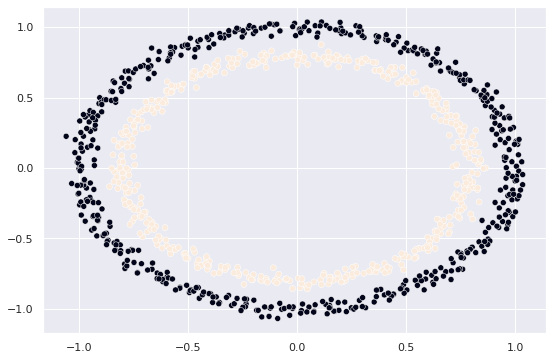

In [100]:
plt.figure(figsize = (9,6))

sns.scatterplot(x = X[:,0],
                y = X[:,1],
                c = y)
plt.show()

### 1.2 Input and Output shape
___

In [101]:
X.shape , y.shape

((1000, 2), (1000,))

In [102]:
X.ndim , y.ndim

(2, 1)

### 1.3 Building a simple model for classification
___

- Base on accuracy model score , it is around 50% or simply put , it is simply doing a guess on whether it is in the inner or outer circle

In [103]:
tf.random.set_seed(42)

# Step 1: Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.binary_accuracy)

#Step 3 : Fiting the model
model_1.fit(X , y , epochs = 5 , verbose = 0)

### 1.4 Simple Improvement of the model 
___
 - (Try) Adding an extra layer and additional epochs

In [104]:
tf.random.set_seed(42)

# Step 1: Create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.binary_accuracy)

#Step 3 : Fiting the model
model_2.fit(X , y , epochs = 100 , verbose = 0)

In [105]:
model_2.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - binary_accuracy: 0.5000


[0.6949685215950012, 0.5]

In [106]:
# Model Accuracy is still guessing with the accuracy at 0.5 even adding an extra layers

In [107]:
tf.random.set_seed(42)

# Step 1: Create a model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = tf.keras.metrics.binary_accuracy)

#Step 3 : Fiting the model
model_3.fit(X , y , epochs = 100 , verbose = 0)

#Step 4 : Evaluating the model
model_3.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - binary_accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

### 1.5 Visualizing the prediction
___

- Take in a trained model , features(X) and labels(y)
- Create a meshgrid of the different X values
- Make preds across the meshgrid
- Plot preds as well as a line between zones

In [108]:
def plot_decision_boundary(model ,x , y):
  """
  Plotting the boundary created by a model predicting on X
  Resources for this plot:
    1.CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define axis boundaries
  x_min , x_max = X[:,0].min() -0.1 , X[:,0].max() + 0.1
  y_min , y_max = X[:,1].min() -0.1 , X[:,1].max() + 0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max , 100),
                        np.linspace(y_min , y_max , 100))

  # Make Prediction
  x_in = np.c_[xx.ravel() , yy.ravel()] # stack 2D array togethers

  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print('This is a multiclass classification')
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else:
    print('This is a binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx , yy , y_pred , cmap = 'binary' , alpha = 0.7)
  plt.scatter(X[:,0] , X[:,1], c = y , s = 40 , cmap='binary')
  plt.xlim(xx.min() , xx.max())
  plt.xlim(yy.min() , yy.max())

This is a binary classification


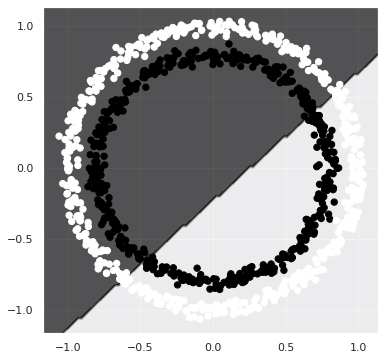

In [109]:
# We tried to improve the model, however it is observed that the perdicting feature is linear , while our data is a circle.

plt.figure(figsize = (6,6))
plot_decision_boundary(model_3 , X , y)

### 1.6 Non- Linearity
___
 - https://playground.tensorflow.org/

In [110]:
tf.random.set_seed(42)
# Step 1 : Create the model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.linear)
])

# Step 2 : Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model

history_4 = model_4.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


This is a binary classification


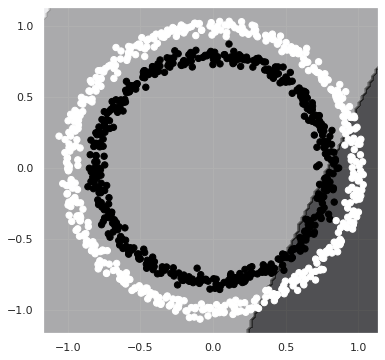

In [111]:
# Evualating model - with linear activation
plt.figure(figsize = (6,6))

plot_decision_boundary(model_4 , X , y)

In [112]:
# Attempting to build model with non-linear activation function
#  https://playground.tensorflow.org/ --> experiment it here
tf.random.set_seed(42)

# Step 1:
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.relu)
])

# Step 2:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3:
model_5.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


This is a binary classification


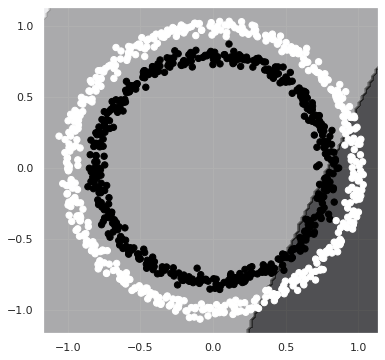

In [113]:
plt.figure(figsize = (6,6))
plot_decision_boundary(model_4 , X , y)

### 1.7 Creating a multi layer neural network from tensorflow playground simulation
___

In [119]:
tf.random.set_seed(42)

# Step 1: Create a model
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Step 2 : Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = tf.keras.metrics.binary_accuracy)

# Step 3 : Fit the model
history_6 = model_6.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


This is a binary classification


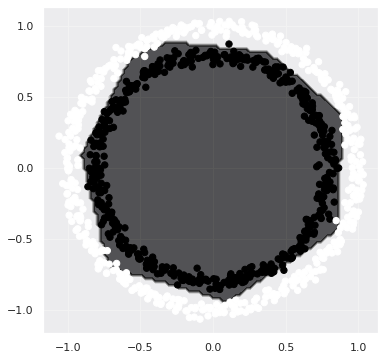

In [120]:
plt.figure(figsize = (6,6))
plot_decision_boundary(model_6 , X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - binary_accuracy: 0.9910
[0.2948004901409149, 0.9909999966621399]


Text(0, 0.5, 'accuracy')

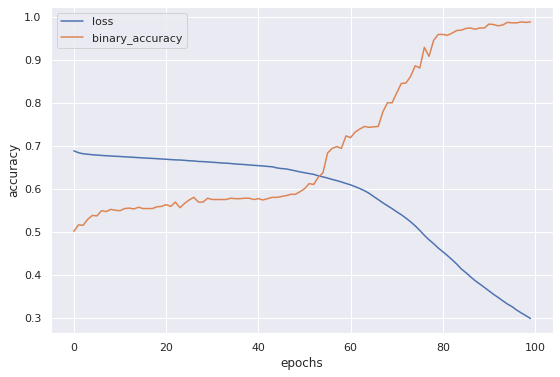

In [127]:
# Evulating 
print(model_6.evaluate(X , y))

pd.DataFrame(history_6.history).plot(figsize = (9,6))
plt.xlabel('epochs')
plt.ylabel('accuracy')